In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv("Netflix_Dataset.csv")

In [4]:
df.head(10)

,Category,Title,Country,Release_Date,Rating,Duration,Type
0,TV Show,3%,Brazil,14-Aug-20,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,Movie,7:19,Mexico,23-Dec-16,TV-MA,93 min,"Dramas, International Movies"
2,Movie,23:59,Singapore,20-Dec-18,R,78 min,"Horror Movies, International Movies"
3,Movie,9,United States,16-Nov-17,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi..."
4,Movie,21,United States,1-Jan-20,PG-13,123 min,Dramas
5,TV Show,46,Turkey,1-Jul-17,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries"
6,Movie,122,Egypt,1-Jun-20,TV-MA,95 min,"Horror Movies, International Movies"
7,Movie,187,United States,1-Nov-19,R,119 min,Dramas
8,Movie,706,India,1-Apr-19,TV-14,118 min,"Horror Movies, International Movies"
9,Movie,1920,India,15-Dec-17,TV-MA,143 min,"Horror Movies, International Movies, Thrillers"


In [5]:
df.rename(columns={'Type': 'Genre'}, inplace=True)
date_like_mask = df['Title'].str.match(r'^\d{1,2}[-/][A-Za-z]{3}$|^\d{4}([-/]\d{1,2}){0,2}$', na=False)
df = df[df['Title'].str.contains('[A-Za-z]', na=False)]
df = df[~date_like_mask]
df = df.reset_index(drop=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_15572\30504086.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[~date_like_mask]


In [6]:
df.head(10)

,Category,Title,Country,Release_Date,Rating,Duration,Genre
0,Movie,​​Kuch Bheege Alfaaz,India,1-Sep-18,TV-14,110 min,"Dramas, Independent Movies, International Movies"
1,Movie,​Goli Soda 2,India,15-Sep-18,TV-14,128 min,"Action & Adventure, Dramas, International Movies"
2,Movie,​Maj Rati ​​Keteki,India,15-Sep-18,TV-14,117 min,"Dramas, International Movies"
3,Movie,​Mayurakshi,India,15-Sep-18,TV-14,100 min,"Dramas, International Movies"
4,TV Show,​SAINT SEIYA: Knights of the Zodiac,Japan,23-Jan-20,TV-14,2 Seasons,"Anime Series, International TV Shows"
5,Movie,(T)ERROR,United States,30-Jun-16,NR,84 min,Documentaries
6,TV Show,(Un)Well,United States,12-Aug-20,TV-MA,1 Season,Reality TV
7,Movie,#Alive,South Korea,8-Sep-20,TV-MA,99 min,"Horror Movies, International Movies, Thrillers"
8,Movie,#AnneFrank - Parallel Stories,Italy,1-Jul-20,TV-14,95 min,"Documentaries, International Movies"
9,TV Show,#blackAF,United States,17-Apr-20,TV-MA,1 Season,TV Comedies


In [7]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df['release_year'] = df['Release_Date'].dt.year

C:\Users\HP\AppData\Local\Temp\ipykernel_15572\1313148573.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')


In [8]:
df[['Release_Date', 'release_year']].head()


,Release_Date,release_year
0,2018-09-01,2018.0
1,2018-09-15,2018.0
2,2018-09-15,2018.0
3,2018-09-15,2018.0
4,2020-01-23,2020.0


In [9]:
df.drop(columns=['Release_Date'], inplace=True)

In [10]:
df.to_csv("Netflix_Cleaned_Dataset.csv", index=False)

# Movies vs TV Shows — which dominates Netflix?

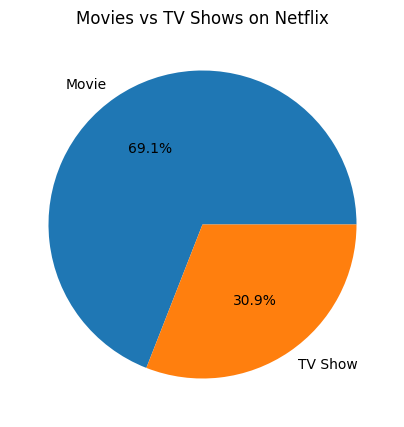

In [11]:
df['Category'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(5,5)
)

plt.title("Movies vs TV Shows on Netflix")
plt.ylabel("")
plt.show()

# Top 10 Genre On Netflix

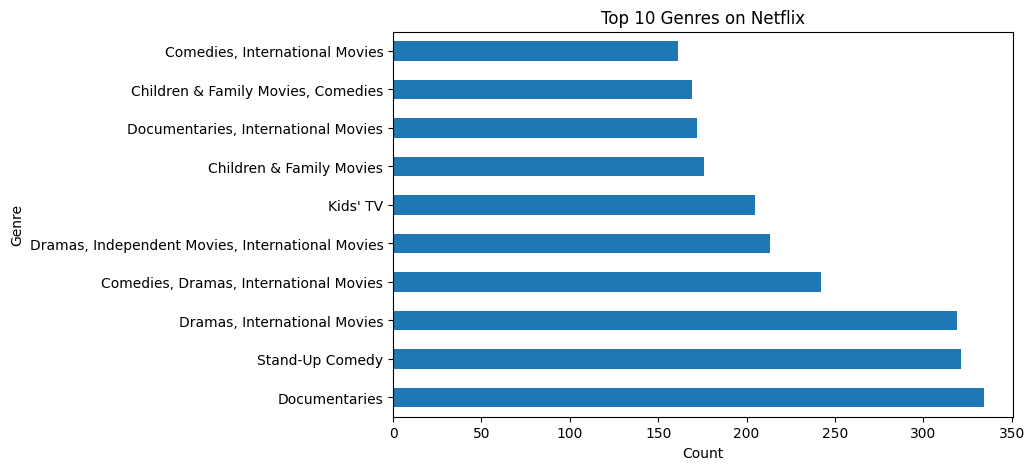

In [12]:
# df['Genre'].value_counts().head(10).plot(kind='bar', figsize=(10,5))
# plt.title("Top 10 Genres on Netflix")
# plt.xlabel("Genre")
# plt.ylabel("Count")
# plt.xticks(rotation=45, ha='right')
# plt.show()
df['Genre'].value_counts().head(10).plot(kind='barh', figsize=(8,5))
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

# Content Growth Over Time

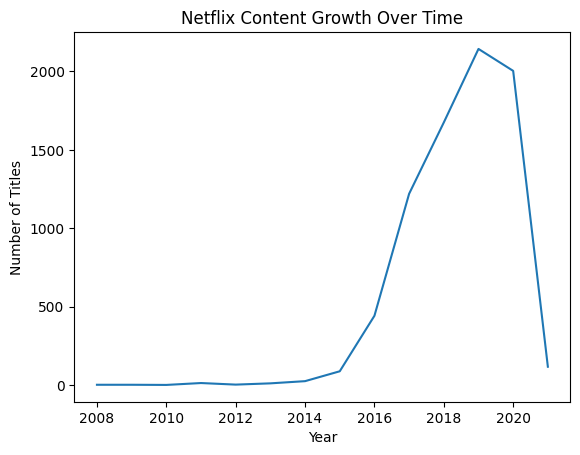

In [13]:
df.groupby('release_year').size().plot()
plt.title("Netflix Content Growth Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()

# Which ratings are most frequent?


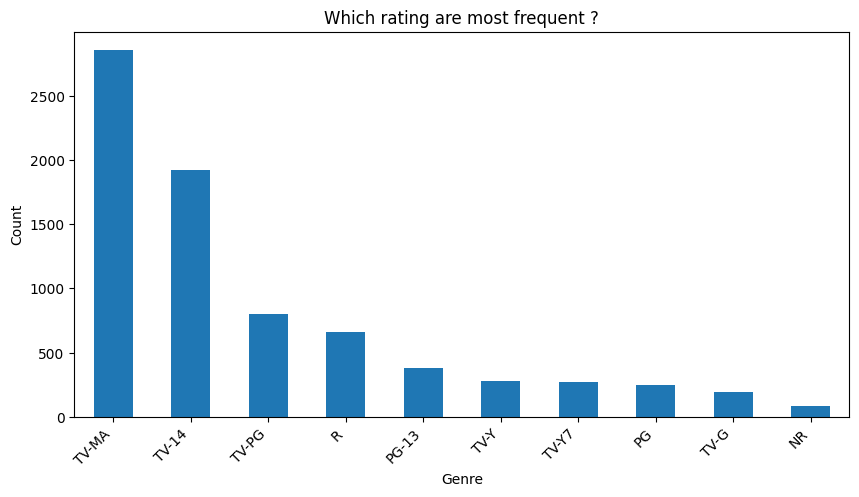

In [16]:
df['Rating'].value_counts().head(10).plot(kind='bar', figsize=(10,5))
plt.title("Which rating are most frequent ?")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.show()

# Country-wise Content Distribution (Top 10 + Others)

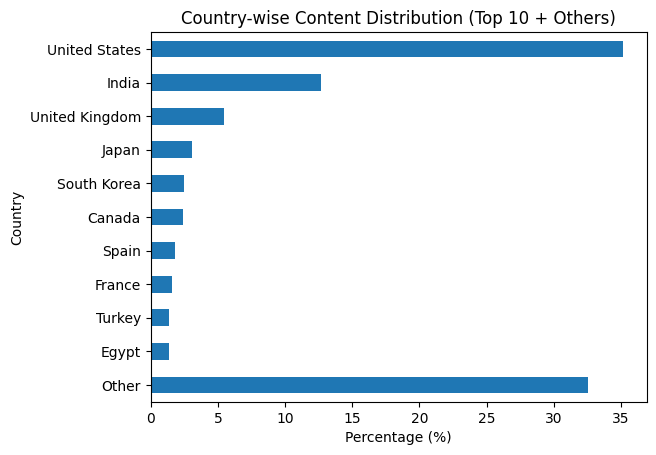

In [43]:
# Separate 'Other'
other = country_percent.loc['Other']
top_only = country_percent.drop('Other')

# Sort descending
top_only = top_only.sort_values(ascending=False)

# Append 'Other' at the END
country_percent_ordered = pd.concat([
    top_only,
    pd.Series({'Other': other})
])

# Plot
country_percent_ordered.plot(kind='barh')
plt.title("Country-wise Content Distribution (Top 10 + Others)")
plt.xlabel("Percentage (%)")
plt.ylabel("Country")
plt.gca().invert_yaxis()
plt.show()